In [21]:
import numpy as np
import torch, torchvision
import cv2
import os
import matplotlib.pyplot as plt

In [22]:
torch.__version__

'1.7.0'

In [23]:
assert torch.__version__.startswith("1.7")

In [24]:
import detectron2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [25]:
test_video = cv2.VideoCapture('/Users/bogdanivanyuk/Desktop/AICrowd/dataset/videos/12.mov')

In [26]:
imgs = list()

In [27]:
counter = 0
while True:
    ret, frame = test_video.read()
    #print(ret, frame)
    if not ret:
        break
    #plt.imshow(frame)
    #plt.show();
    imgs.append(frame)
    counter += 1
    if counter > 50:
        break

In [28]:
len(imgs)

51

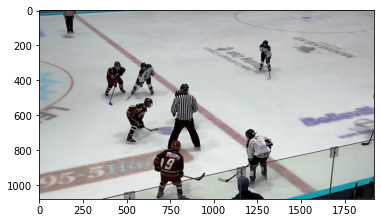

In [29]:
plt.imshow(imgs[0])
plt.show()

In [30]:
cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(imgs[0])

In [38]:
outputs['instances']

Instances(num_instances=13, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[7.3494e+02, 4.1660e+02, 9.3199e+02, 8.0154e+02],
        [3.7562e+02, 2.9066e+02, 5.0486e+02, 4.9682e+02],
        [1.1813e+03, 6.8245e+02, 1.3427e+03, 9.9863e+02],
        [6.5167e+02, 7.4320e+02, 8.4533e+02, 1.0795e+03],
        [1.3548e+02, 6.3220e-01, 2.0683e+02, 1.3461e+02],
        [4.9699e+02, 4.9512e+02, 6.5750e+02, 7.7010e+02],
        [1.2609e+03, 1.7366e+02, 1.3308e+03, 3.5072e+02],
        [5.1802e+02, 2.9325e+02, 6.6302e+02, 5.0025e+02],
        [1.1039e+03, 9.5416e+02, 1.2885e+03, 1.0800e+03],
        [5.0039e+02, 7.4586e+02, 5.5507e+02, 7.6881e+02],
        [3.8520e+02, 4.5321e+02, 5.0733e+02, 5.4499e+02],
        [6.7232e+02, 1.0536e+03, 8.7224e+02, 1.0800e+03],
        [6.1696e+02, 3.0819e+02, 6.6303e+02, 3.7600e+02]])), scores: tensor([0.9990, 0.9985, 0.9983, 0.9978, 0.9974, 0.9973, 0.9946, 0.9909, 0.9691,
        0.6346, 0.5634, 0.5432, 0.5202]), pred_classes: tensor([

In [31]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36, 30, 30, 24])
Boxes(tensor([[7.3494e+02, 4.1660e+02, 9.3199e+02, 8.0154e+02],
        [3.7562e+02, 2.9066e+02, 5.0486e+02, 4.9682e+02],
        [1.1813e+03, 6.8245e+02, 1.3427e+03, 9.9863e+02],
        [6.5167e+02, 7.4320e+02, 8.4533e+02, 1.0795e+03],
        [1.3548e+02, 6.3220e-01, 2.0683e+02, 1.3461e+02],
        [4.9699e+02, 4.9512e+02, 6.5750e+02, 7.7010e+02],
        [1.2609e+03, 1.7366e+02, 1.3308e+03, 3.5072e+02],
        [5.1802e+02, 2.9325e+02, 6.6302e+02, 5.0025e+02],
        [1.1039e+03, 9.5416e+02, 1.2885e+03, 1.0800e+03],
        [5.0039e+02, 7.4586e+02, 5.5507e+02, 7.6881e+02],
        [3.8520e+02, 4.5321e+02, 5.0733e+02, 5.4499e+02],
        [6.7232e+02, 1.0536e+03, 8.7224e+02, 1.0800e+03],
        [6.1696e+02, 3.0819e+02, 6.6303e+02, 3.7600e+02]]))


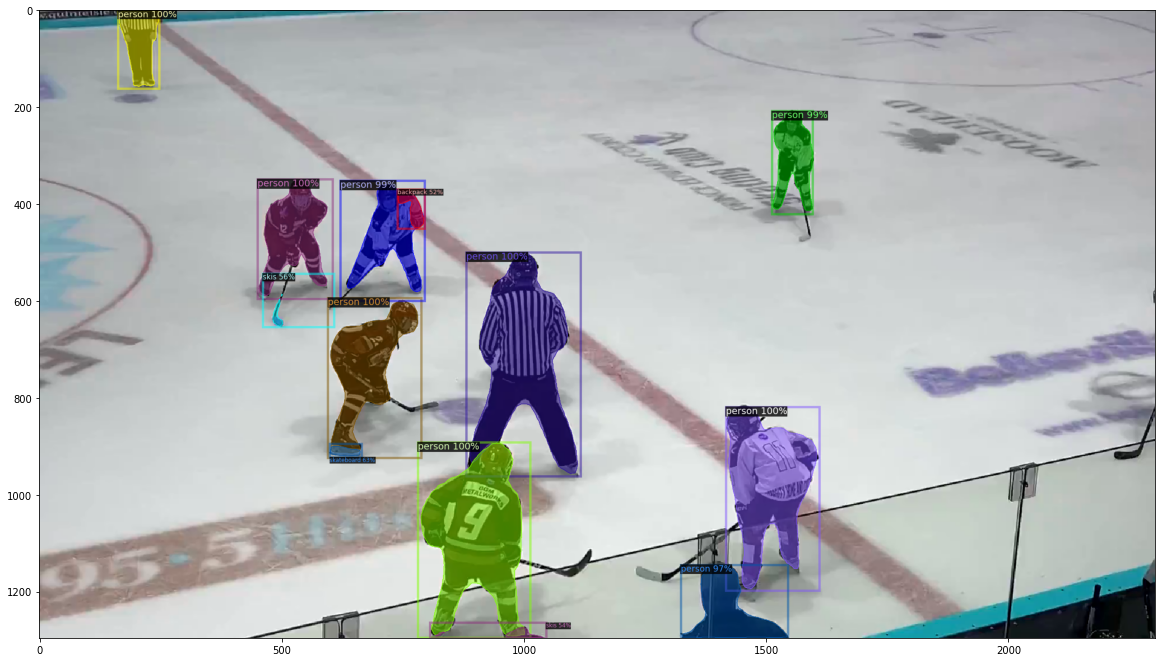

In [16]:
v = Visualizer(imgs[0][:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20, 18))
plt.imshow(out.get_image()[:, :, ::-1])
plt.savefig('test.jpg')
plt.show()

In [43]:
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(imgs[0])

In [18]:
outputs

{'sem_seg': tensor([[[ 2.4029e-01,  2.4029e-01,  2.3959e-01,  ...,  1.5639e+00,
            1.5146e+00,  1.4762e+00],
          [ 2.4029e-01,  2.4029e-01,  2.3959e-01,  ...,  1.5639e+00,
            1.5146e+00,  1.4762e+00],
          [ 2.6735e-01,  2.6735e-01,  2.6725e-01,  ...,  1.5845e+00,
            1.5331e+00,  1.4930e+00],
          ...,
          [ 1.6583e+00,  1.6583e+00,  1.6886e+00,  ...,  4.2246e+00,
            4.1499e+00,  4.0916e+00],
          [ 1.6001e+00,  1.6001e+00,  1.6316e+00,  ...,  4.2079e+00,
            4.1357e+00,  4.0793e+00],
          [ 1.5548e+00,  1.5548e+00,  1.5871e+00,  ...,  4.1949e+00,
            4.1246e+00,  4.0698e+00]],
 
         [[ 2.7849e+00,  2.7849e+00,  2.7911e+00,  ...,  1.2547e+00,
            1.2598e+00,  1.2637e+00],
          [ 2.7849e+00,  2.7849e+00,  2.7911e+00,  ...,  1.2547e+00,
            1.2598e+00,  1.2637e+00],
          [ 2.7889e+00,  2.7889e+00,  2.7955e+00,  ...,  1.2571e+00,
            1.2639e+00,  1.2693e+00],
        

In [19]:
print(outputs["panoptic_seg"])
print(len(outputs['panoptic_seg']))

(tensor([[11, 11, 11,  ..., 11, 11, 11],
        [11, 11, 11,  ..., 11, 11, 11],
        [11, 11, 11,  ..., 11, 11, 11],
        ...,
        [11, 11, 11,  ..., 11, 11, 11],
        [11, 11, 11,  ..., 11, 11, 11],
        [11, 11, 11,  ..., 11, 11, 11]], dtype=torch.int32), [{'id': 1, 'isthing': True, 'score': 0.9985301494598389, 'category_id': 0, 'instance_id': 0}, {'id': 2, 'isthing': True, 'score': 0.9985164999961853, 'category_id': 0, 'instance_id': 1}, {'id': 3, 'isthing': True, 'score': 0.9977346658706665, 'category_id': 0, 'instance_id': 2}, {'id': 4, 'isthing': True, 'score': 0.9970675110816956, 'category_id': 0, 'instance_id': 3}, {'id': 5, 'isthing': True, 'score': 0.996692419052124, 'category_id': 0, 'instance_id': 4}, {'id': 6, 'isthing': True, 'score': 0.9963764548301697, 'category_id': 0, 'instance_id': 5}, {'id': 7, 'isthing': True, 'score': 0.9955394864082336, 'category_id': 0, 'instance_id': 6}, {'id': 8, 'isthing': True, 'score': 0.9915764927864075, 'category_id': 0, 

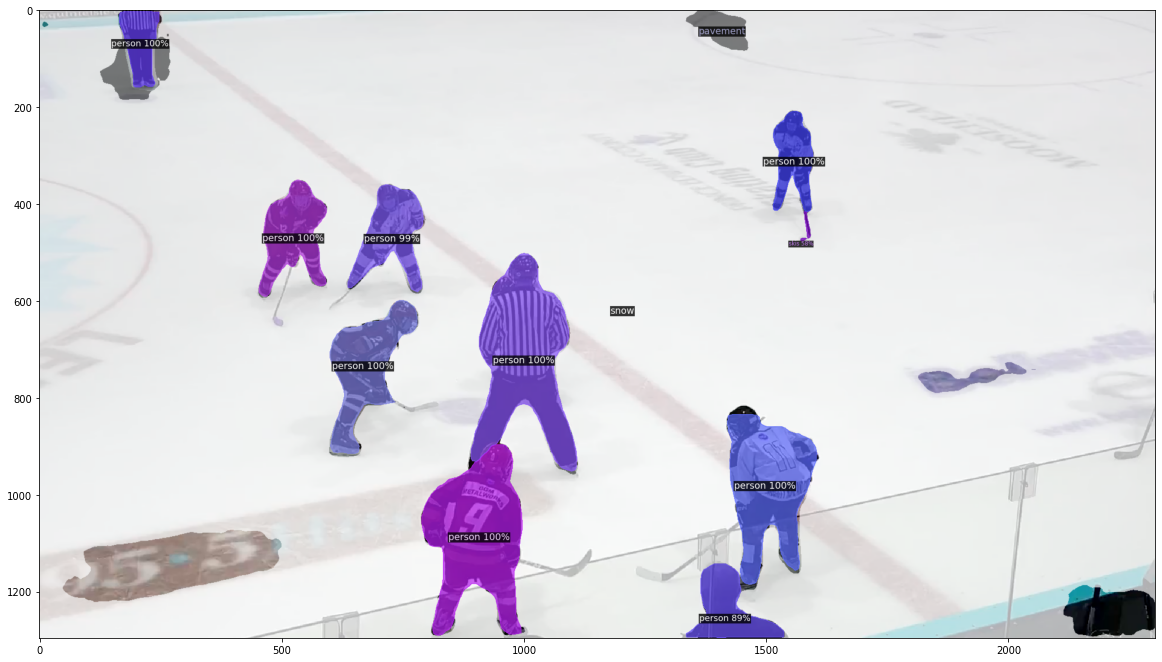

In [20]:
v = Visualizer(imgs[0][:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1])
plt.figure(figsize=(20, 18))
plt.imshow(out.get_image()[:, :, ::-1])
plt.savefig('test.jpg')
plt.show()

In [44]:
img = cv2.imread('421.jpg')

In [45]:
outputs = predictor(img)

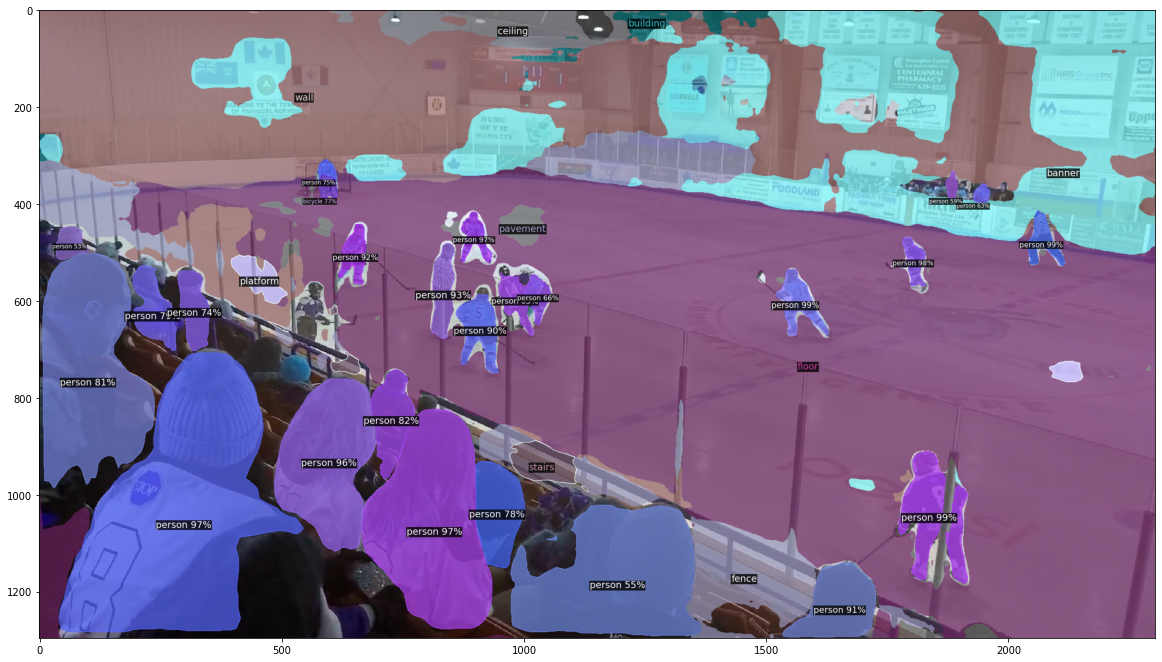

In [47]:
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(outputs["panoptic_seg"][0].to("cpu"), outputs["panoptic_seg"][1])
plt.figure(figsize=(20, 18))
plt.imshow(out.get_image()[:, :, ::-1])
plt.savefig('test.jpg')
plt.show()